# Impresiones dobles

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import random
import matplotlib.pyplot as plt


CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('data')

import impresiones

Hemos construido toda una función la cual nos generá impresiones dobles de algunas partes de los documentos, esta función se encuentra en `src/impresiones.py`, sin entrar en mas detalles funciona de la siguente forma. Generamos una lista con los nombres de las imagenes

In [2]:
files = sorted([f for f in DATA_DIR.joinpath('Process','Red','impresiones').iterdir() if f.is_file()])

Creamos el objeto el cual contiene nuestras funciones

In [9]:
tool = impresiones.Impresion()

Cargamos la imagen a la cual queremos recortar y de forma aletaria recortara una seccion de ella, a continuación mostramos la seccion

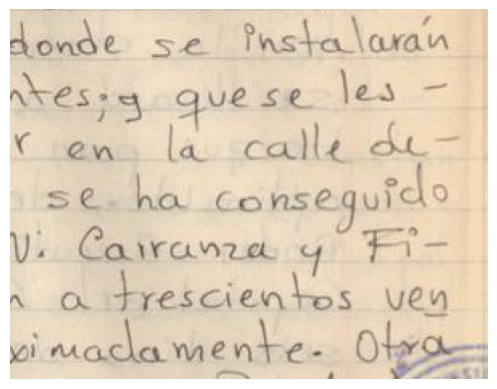

In [22]:
tool.direccion(str(files[1]))
coor2 = tool.coordenas_random()
imagen = tool.recortar(coor2)
plt.imshow(imagen)
plt.axis('off')
plt.show()

Ahora vamos a agregar esta imagen a la imagen original y generando lo siguente, mencionar que lo que esta entre las dos filas de los gatos son unicamente instrucciones para una mejor visualizacion

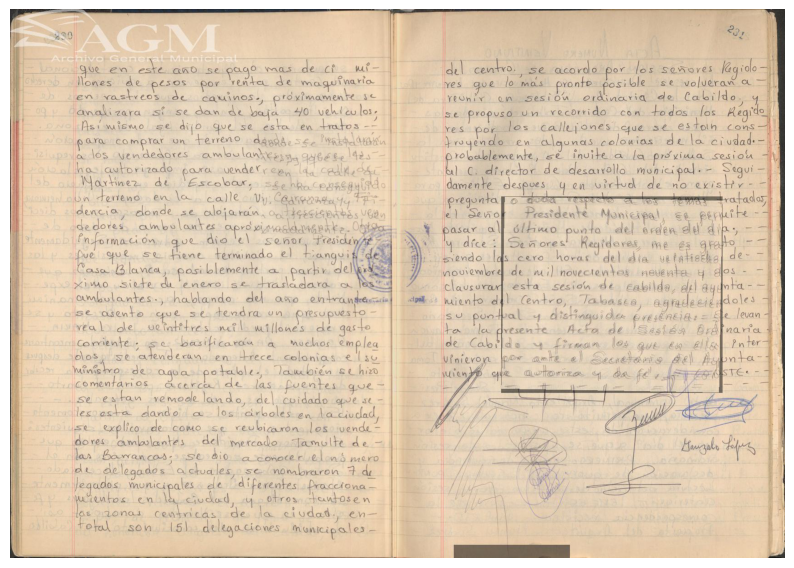

In [23]:
imagen2 = tool.hacer_impresiones(imagen,coor2[:2])

######################################################
ancho_pulgadas = 10
alto_pulgadas = 8
fig = plt.gcf()
fig.set_size_inches(ancho_pulgadas, alto_pulgadas)
dpi = 300
plt.axis('off')
plt.gca().set_rasterized(True)
#######################################################
plt.imshow(imagen2)
plt.show()

Notamos que hay una parte que tiene algo sobre escrito, como si se hubiera perdido manchado, lo cual era nuestro objetivo, para completar, volveremos a hacer el proceso para que cada página tenga dos defectos

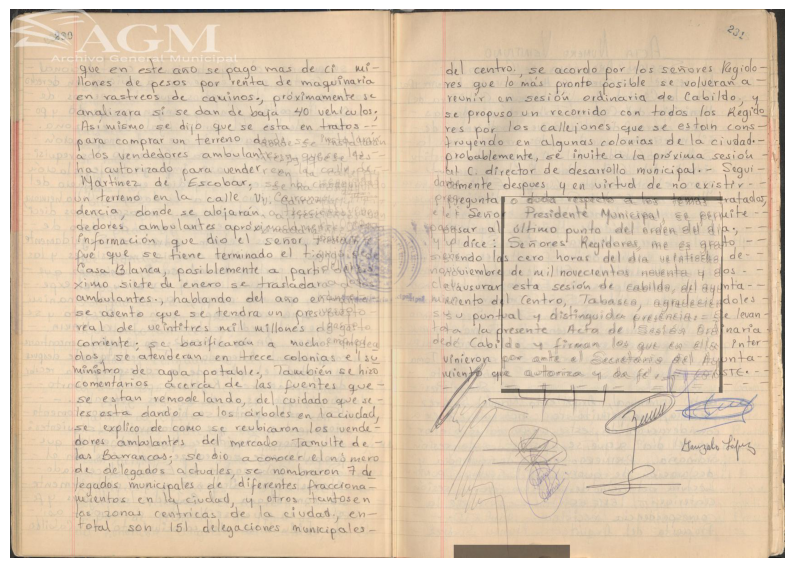

In [24]:
coor2 = tool.coordenas_random()
imagen = tool.recortar(coor2)
imagen2 = tool.hacer_impresiones(imagen,coor2[:2])
######################################################
ancho_pulgadas = 10
alto_pulgadas = 8
fig = plt.gcf()
fig.set_size_inches(ancho_pulgadas, alto_pulgadas)
dpi = 300
plt.gca().set_rasterized(True)
plt.axis('off')
#######################################################
plt.imshow(imagen2)
plt.show()


In [7]:
for file in files:
    tool.direccion(file)
    for i in range(2):
        coor2 = tool.coordenas_random()
        imagen = tool.recortar(coor2)
        imagen2 = tool.hacer_impresiones(imagen,coor2[:2])
    tool.imagen.save(str(file))